In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    q_url = f"{url}appid={weather_api_key}&units=metric"
    city_url = f"{q_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = (city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | porto novo
Processing Record 4 of Set 1 | cambria
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | el fasher
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | mitu
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | yanam
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 15 of Set 1 | bure
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | kapuskasing
Processing Record 18 of Set 1 | bikenibeu village
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | caleta de

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,27.05,48,0,2.06,US,1698344041
1,dudinka,69.4058,86.1778,-12.96,99,93,1.34,RU,1698344041
2,porto novo,6.4965,2.6036,27.90,83,73,3.03,BJ,1698344042
3,cambria,35.5641,-121.0808,21.39,89,5,1.34,US,1698344042
4,longyearbyen,78.2186,15.6401,-4.09,80,75,4.63,SJ,1698344043


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,27.05,48,0,2.06,US,1698344041
1,dudinka,69.4058,86.1778,-12.96,99,93,1.34,RU,1698344041
2,porto novo,6.4965,2.6036,27.90,83,73,3.03,BJ,1698344042
3,cambria,35.5641,-121.0808,21.39,89,5,1.34,US,1698344042
4,longyearbyen,78.2186,15.6401,-4.09,80,75,4.63,SJ,1698344043


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

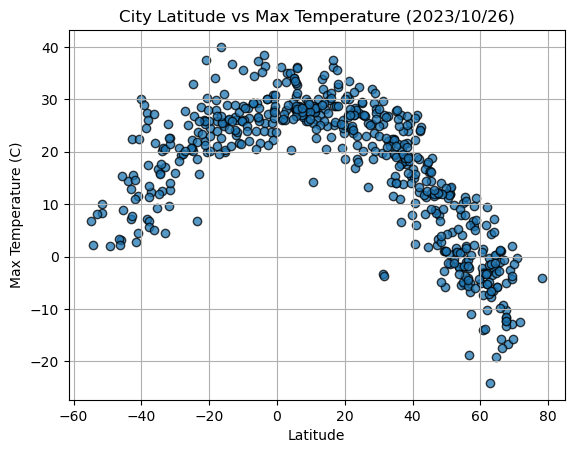

In [63]:
# Build scatter plot for latitude vs. temperature
x_axis= city_data_df["Lat"]
y_axis=city_data_df["Max Temp"]

fig1 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023/10/26)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

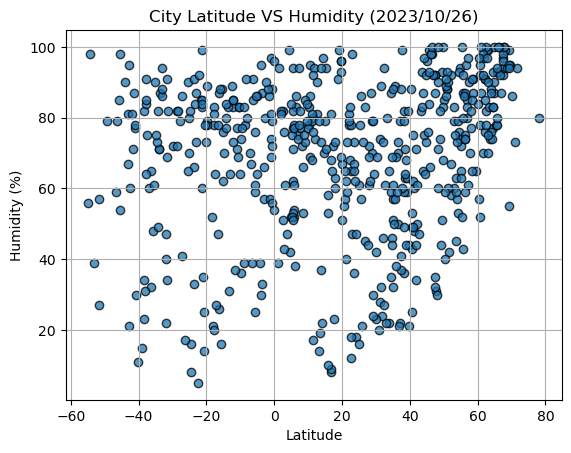

In [64]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]
fig2= plt.scatter(x_axis,y_axis,marker="o",edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude VS Humidity (2023/10/26)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

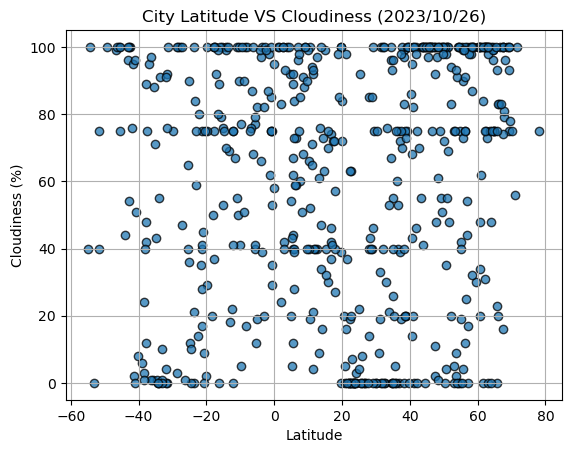

In [65]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]
fig3= plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.title('City Latitude VS Cloudiness (2023/10/26)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

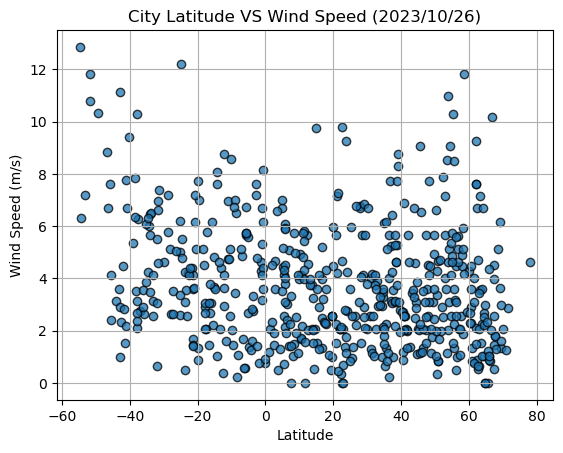

In [66]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]
fig4=plt.scatter(x_axis, y_axis, marker="o",edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude VS Wind Speed (2023/10/26)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots

'''
 (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
 regress_values = x_axis * slope + intercept
 line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
 plt.scatter(x_axis,y_axis)
 plt.plot(x_axis,regress_values,"r-")
 plt.annotate(line_eq,(-40,15), fontsize=15,color="red")
 print(f"The r value is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}")
 '''

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,27.05,48,0,2.06,US,1698344041
1,dudinka,69.4058,86.1778,-12.96,99,93,1.34,RU,1698344041
2,porto novo,6.4965,2.6036,27.90,83,73,3.03,BJ,1698344042
3,cambria,35.5641,-121.0808,21.39,89,5,1.34,US,1698344042
4,longyearbyen,78.2186,15.6401,-4.09,80,75,4.63,SJ,1698344043


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,adamstown,-25.0660,-130.1015,22.24,80,90,5.03,PN,1698344048
11,port-aux-francais,-49.3500,70.2167,1.97,79,100,10.34,TF,1698344052
12,saint-pierre,-21.3393,55.4781,25.82,83,40,3.60,RE,1698344054
17,puerto ayora,-0.7393,-90.3518,29.98,88,75,3.58,EC,1698344063
20,caleta de carquin,-11.0925,-77.6267,21.62,71,55,4.76,PE,1698344065


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.89


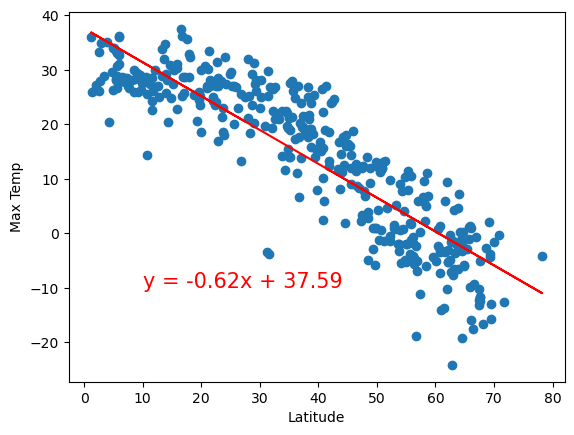

In [62]:
# Linear regression on Northern Hemispher
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,-10), fontsize=15,color="red")


print(f"The r-value is {round(rvalue,2)}")

plt.show()

The r-Value is 0.73


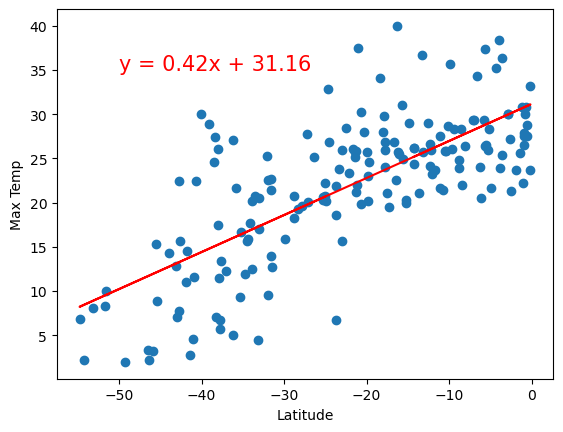

In [49]:
# Linear regression on Southern Hemispher
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Max Temp"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,35), fontsize=15,color="red")
print(f"The r-Value is {round(rvalue,2)}")

plt.show()




**Discussion about the linear relationship:** 

There is a opposite linear relashionship between the two hemisphers as visualy shown, one increases its temperature (Southern)  as it approaches 0 and the other one (Northern) decreases

### Humidity vs. Latitude Linear Regression Plot

The r-Value is 0.31


<function matplotlib.pyplot.show(close=None, block=None)>

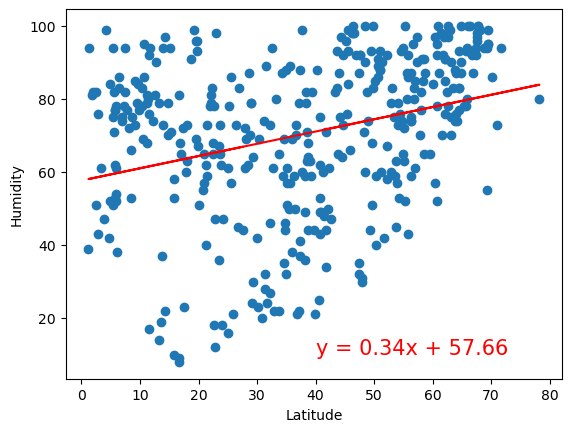

In [50]:
# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Humidity"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10), fontsize=15,color="red")

print(f"The r-Value is {round(rvalue,2)}")

plt.show



The r-Value is 0.1


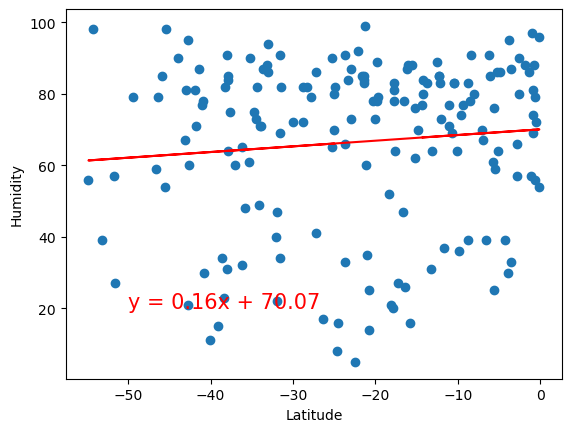

In [47]:
# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Humidity"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20), fontsize=15,color="red")

print(f"The r-Value is {round(rvalue,2)}")

plt.show()


**Discussion about the linear relationship:** 


There is no apparently linear regression


### Cloudiness vs. Latitude Linear Regression Plot

The r-Value is 0.2


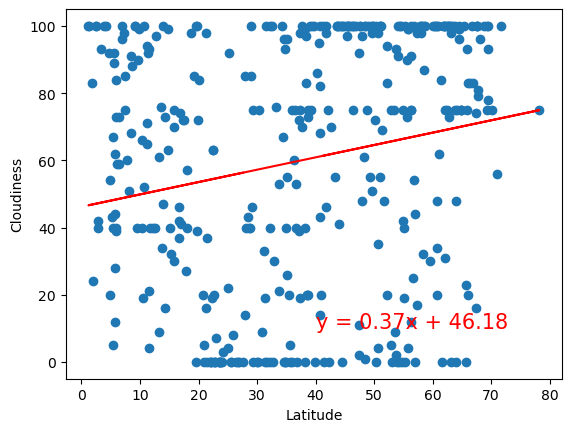

In [52]:
# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10), fontsize=15,color="red")

print(f"The r-Value is {round(rvalue,2)}")

plt.show()

The r-Value is 0.16


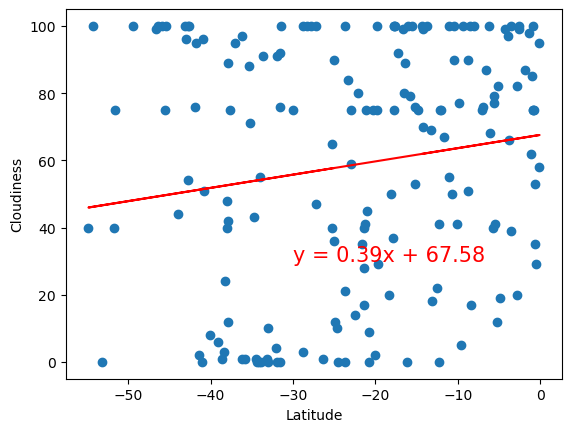

In [54]:
# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,30), fontsize=15,color="red")

print(f"The r-Value is {round(rvalue,2)}")

plt.show()

**Discussion about the linear relationship:** 

There is no apparently linear regression

### Wind Speed vs. Latitude Linear Regression Plot

The r-Value is 0.01


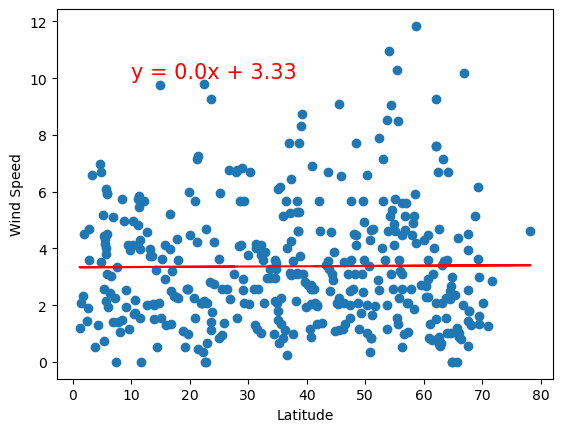

In [57]:
# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis= northern_hemi_df["Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=15,color="red")

print(f"The r-Value is {round(rvalue,2)}")

plt.show()

The r-Value is -0.29


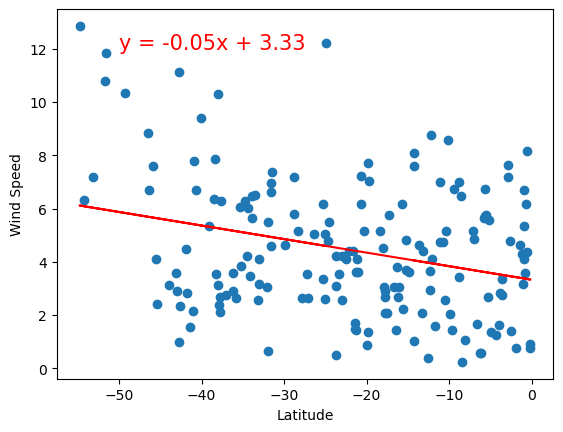

In [60]:
# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel(y_axis.name)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,12), fontsize=15,color="red")

print(f"The r-Value is {round(rvalue,2)}")

plt.show()

**Discussion about the linear relationship:**

There is no apparently linear regression